In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import sys, random
from problem import *
from utils import *
from math import inf
from itertools import permutations

In [2]:
G = nx.complete_graph(25)
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(0,10)

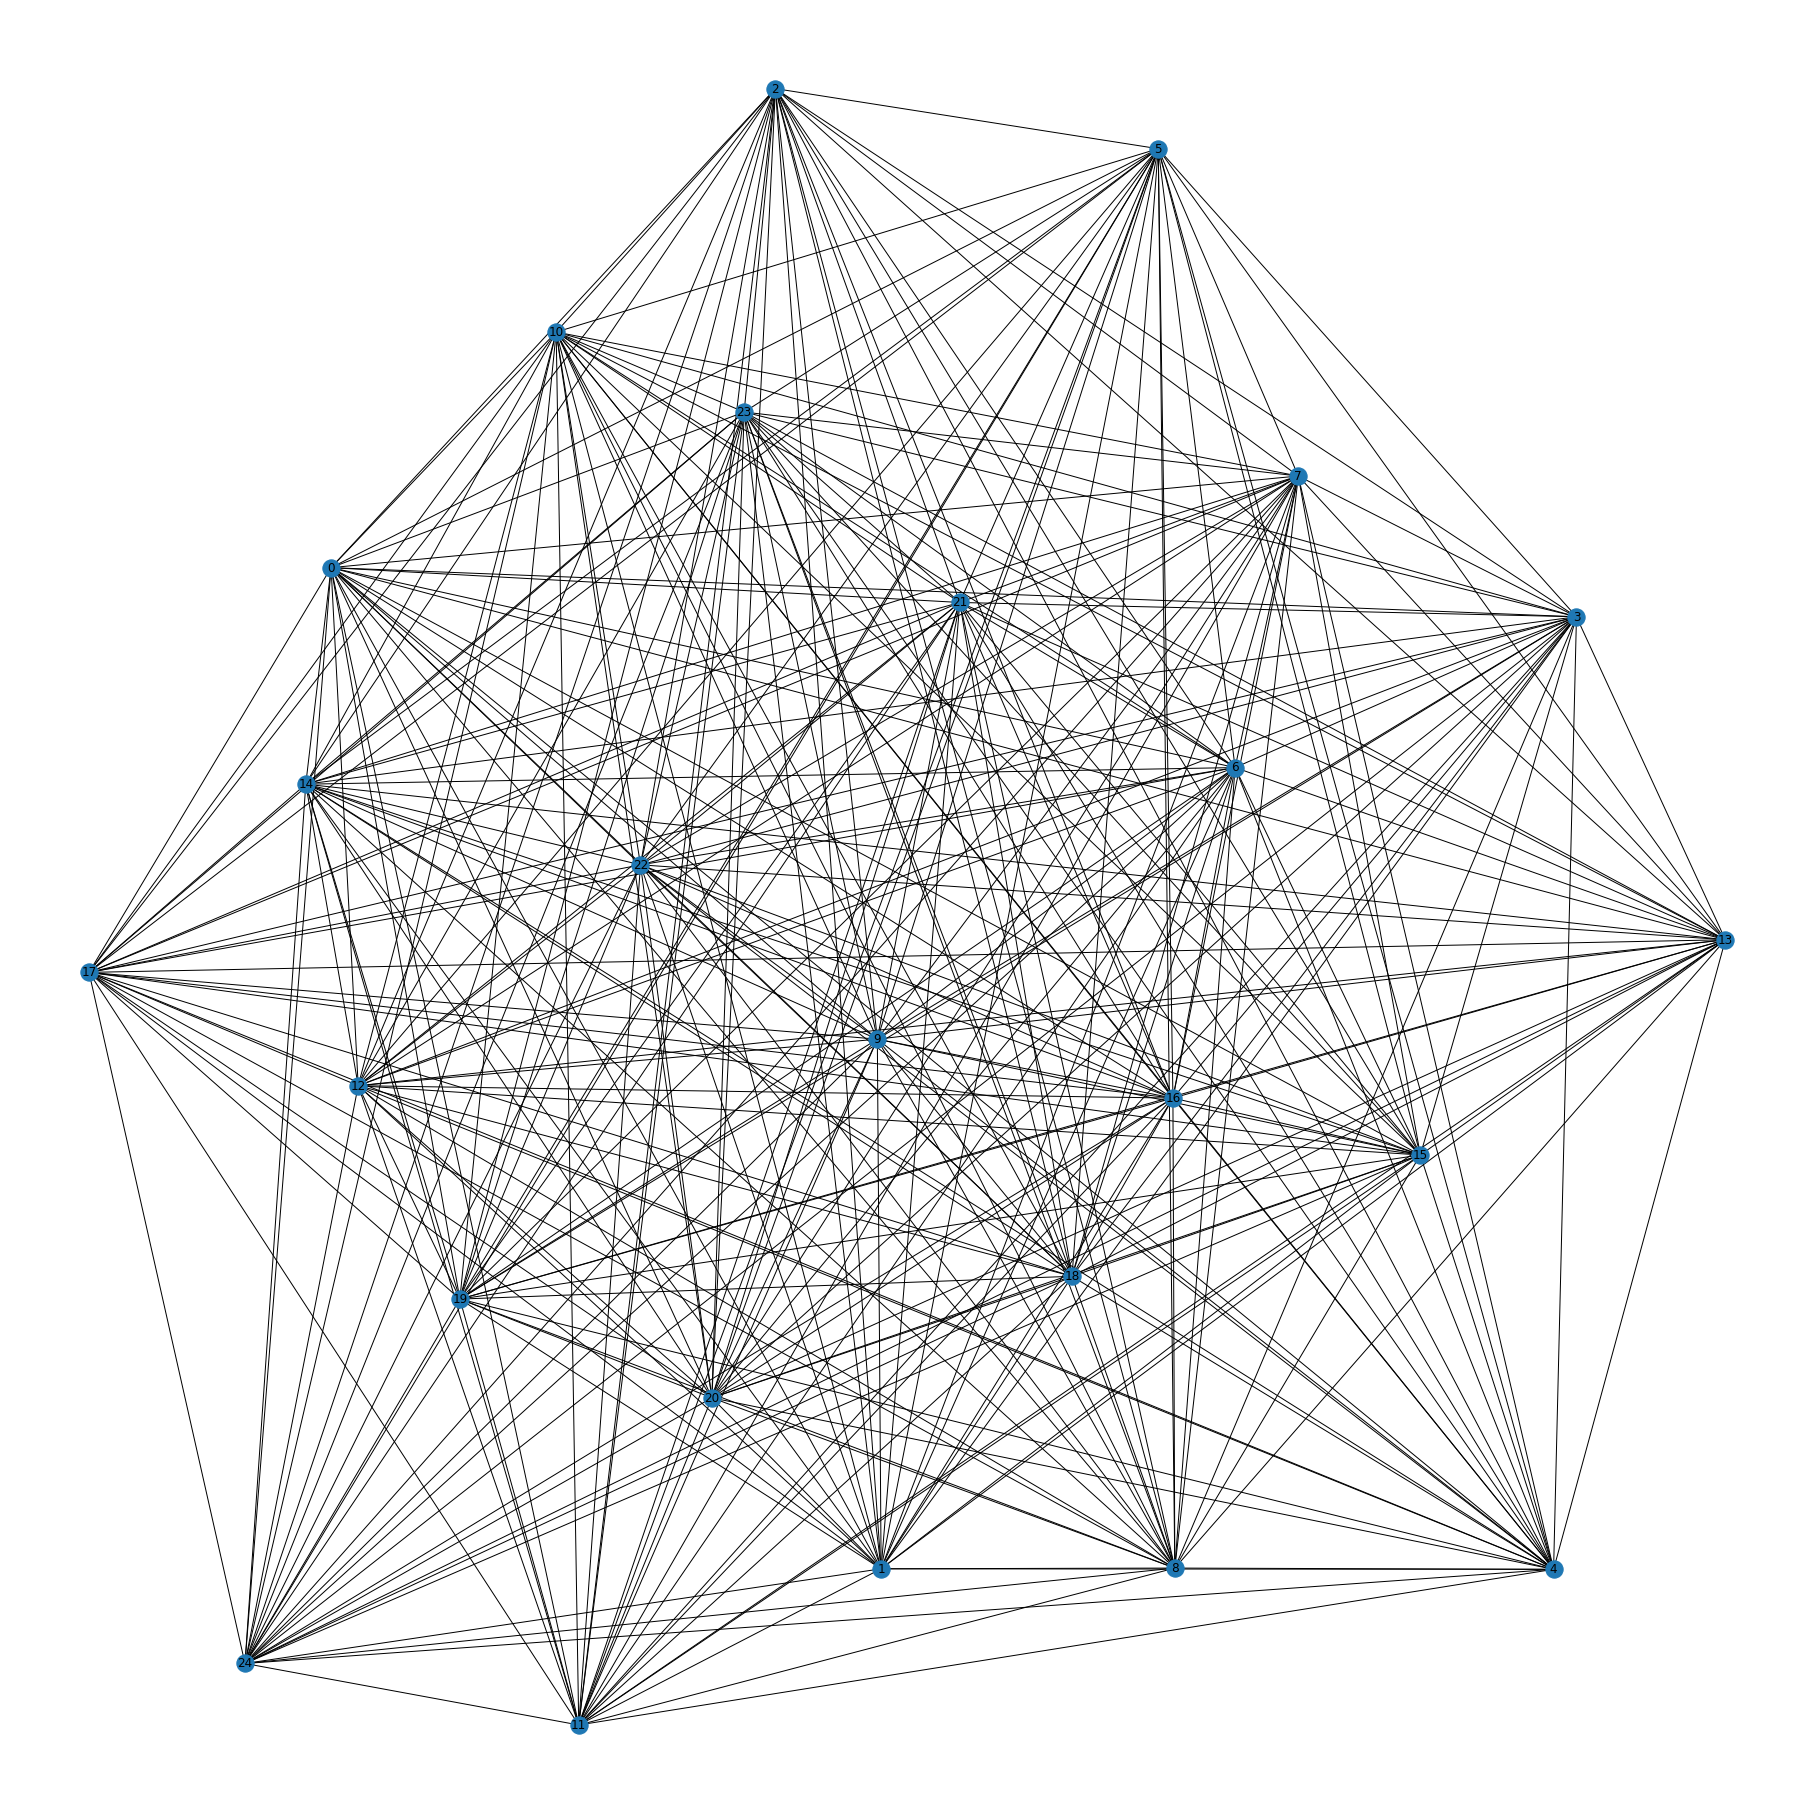

In [3]:
plt.figure(figsize=(25,25)) 
nx.draw(G, with_labels=True)
plt.show()

In [4]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24))

In [5]:
import random

In [6]:
def random_permutation(iterable, r=None, number_of_perms = 50):
    "Random selection from itertools.permutations(iterable, r)"
    for i in range(number_of_perms):
        pool = tuple(iterable)
        r = len(pool) if r is None else r
        yield tuple(random.sample(pool, r))

In [7]:
def PMX_crossover(p1, p2):
    total_length = len(p1)
    first_Cross = random.randint(0, total_length // 2)
    second_Cross = random.randint(total_length // 2 + 1, total_length - 1) + 1
    child = [0] * total_length
    subP1 = p1[first_Cross:second_Cross]
    subP2 = p2[first_Cross:second_Cross]
    pairs = list()
    for element in subP2:
        if element not in subP1:
            pairs.append((element, subP1[subP2.index(element)]))
    for pair in pairs:
        second = pair[1]
        if second not in subP2:
            index = p2.index(second)
            child[index] = pair[0]
        else:
            reflect = p1[p2.index(second)]
            # bouncing back and forth
            # to get out of subP2
            while reflect in subP2:
                bounce = reflect
                reflect = p1[p2.index(bounce)]
            child[p2.index(reflect)] = pair[0]
    child[first_Cross:second_Cross] = subP1
    for i in range(total_length):
        if child[i] == 0:
            child[i] = p2[i]
    return child

In [8]:
def insert_mutation(member):
    length = len(member)
    first_gene = random.randint(0, length - 1)
    second_gene = random.randint(0, length - 1)
    member[first_gene], member[second_gene] = member[second_gene], member[first_gene]
    return member

In [9]:
a = [1,2,3,4,5,6]

In [10]:
[*random_permutation(a)]

[(4, 1, 3, 6, 2, 5),
 (1, 4, 2, 5, 3, 6),
 (6, 1, 4, 2, 5, 3),
 (1, 3, 6, 5, 4, 2),
 (4, 6, 3, 5, 2, 1),
 (2, 4, 5, 6, 1, 3),
 (5, 4, 3, 2, 6, 1),
 (6, 3, 1, 2, 5, 4),
 (3, 2, 6, 5, 1, 4),
 (4, 1, 5, 3, 6, 2),
 (6, 4, 3, 5, 1, 2),
 (4, 6, 1, 3, 2, 5),
 (3, 5, 1, 2, 6, 4),
 (2, 3, 5, 4, 6, 1),
 (3, 2, 1, 6, 4, 5),
 (1, 3, 2, 5, 6, 4),
 (3, 1, 6, 5, 4, 2),
 (5, 3, 6, 2, 4, 1),
 (3, 1, 5, 6, 2, 4),
 (2, 3, 1, 5, 6, 4),
 (5, 1, 3, 2, 4, 6),
 (3, 1, 5, 2, 4, 6),
 (5, 1, 2, 6, 4, 3),
 (1, 2, 6, 3, 5, 4),
 (5, 1, 4, 6, 2, 3),
 (4, 6, 1, 2, 5, 3),
 (3, 2, 6, 1, 4, 5),
 (5, 3, 1, 2, 6, 4),
 (1, 5, 6, 2, 4, 3),
 (1, 3, 2, 6, 4, 5),
 (5, 1, 4, 2, 6, 3),
 (5, 6, 4, 1, 3, 2),
 (5, 2, 6, 3, 4, 1),
 (6, 3, 2, 4, 5, 1),
 (1, 4, 5, 3, 6, 2),
 (6, 5, 2, 3, 4, 1),
 (5, 2, 4, 3, 1, 6),
 (6, 5, 1, 2, 3, 4),
 (5, 3, 4, 2, 1, 6),
 (6, 2, 5, 3, 4, 1),
 (5, 3, 4, 1, 6, 2),
 (1, 2, 5, 4, 6, 3),
 (5, 2, 6, 3, 4, 1),
 (2, 5, 1, 4, 3, 6),
 (6, 1, 2, 5, 3, 4),
 (3, 2, 1, 6, 4, 5),
 (2, 6, 4, 5, 1, 3),
 (5, 3, 2, 1,

In [11]:
population = [(member, getWeight(G, member)) for member in [*random_permutation(list(G.nodes()),number_of_perms= 50)]]

In [12]:
ngen = 500
population

[((11,
   16,
   8,
   14,
   15,
   10,
   2,
   19,
   12,
   4,
   0,
   3,
   20,
   17,
   13,
   9,
   7,
   6,
   5,
   18,
   22,
   21,
   23,
   1,
   24),
  141),
 ((12,
   18,
   24,
   21,
   13,
   3,
   15,
   10,
   23,
   0,
   6,
   8,
   2,
   5,
   22,
   14,
   1,
   9,
   16,
   11,
   17,
   19,
   4,
   7,
   20),
  119),
 ((5,
   23,
   20,
   8,
   24,
   4,
   16,
   9,
   6,
   14,
   3,
   12,
   15,
   2,
   10,
   17,
   19,
   11,
   18,
   7,
   0,
   13,
   22,
   1,
   21),
  133),
 ((17,
   18,
   1,
   16,
   4,
   9,
   2,
   7,
   12,
   10,
   3,
   23,
   15,
   24,
   0,
   14,
   19,
   8,
   11,
   5,
   6,
   22,
   13,
   20,
   21),
  117),
 ((17,
   6,
   15,
   0,
   16,
   9,
   7,
   23,
   13,
   20,
   10,
   24,
   21,
   19,
   3,
   2,
   14,
   5,
   1,
   22,
   8,
   18,
   4,
   12,
   11),
  126),
 ((18,
   19,
   12,
   7,
   6,
   0,
   1,
   11,
   2,
   5,
   10,
   13,
   9,
   20,
   3,
   4,
   22,
   21,
   16,
   8,


In [13]:
from problem import probability

In [14]:
for generation in range(ngen):
    # 1- we have a sorted pool of 50 random paths with respect to their length
    # 2- mutate a random even number of best paths in population
    # 3- crossover them (PMX)
    # 4- insert half that even number into the pool to keep the population to be 50 members
    # 5- after `ngen` return the best path
    sorted(population, key = lambda member : member[1])
    

In [15]:
min(population, key = lambda member : member[1])

((22,
  9,
  5,
  14,
  24,
  7,
  6,
  15,
  8,
  1,
  4,
  21,
  12,
  17,
  13,
  10,
  18,
  16,
  19,
  2,
  20,
  23,
  11,
  3,
  0),
 94)